In [1]:
# https://github.com/Phlya/adjustText/blob/master/docs/source/Examples.ipynb
%matplotlib inline
import matplotlib.pyplot as plt # Matplotlib 2.0 shown here
from adjustText import adjust_text
import numpy as np
import pandas as pd

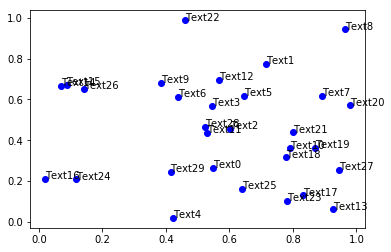

In [2]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]

8

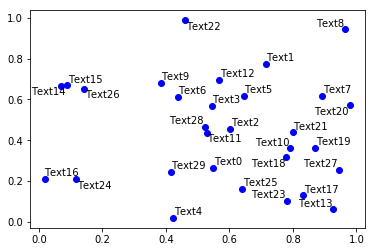

In [3]:
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
adjust_text(texts)

8

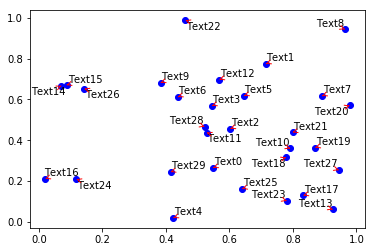

In [4]:
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

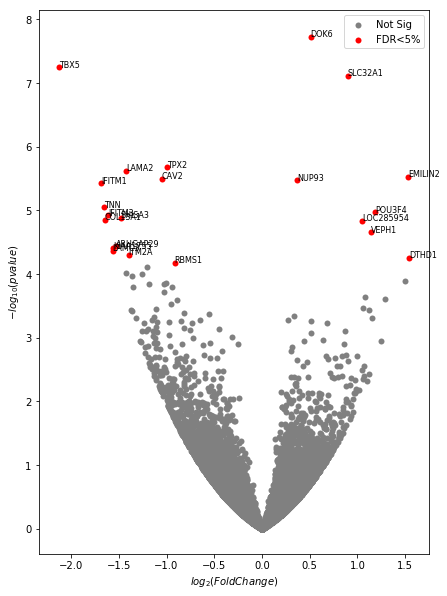

In [5]:
data = pd.read_csv('volcano_data.csv')
def plot_volcano(adjust=False, **kwargs):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['log2FoldChange'][data['padj']>=threshold], -np.log10(data['pvalue'][data['padj']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['log2FoldChange'][data['padj']<threshold], -np.log10(data['pvalue'][data['padj']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Gene'][data['padj']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title('%s iterations' % adjust_text(texts,
                                                arrowprops=dict(arrowstyle="-", color='k', lw=0.5), **kwargs))
_ = plot_volcano()

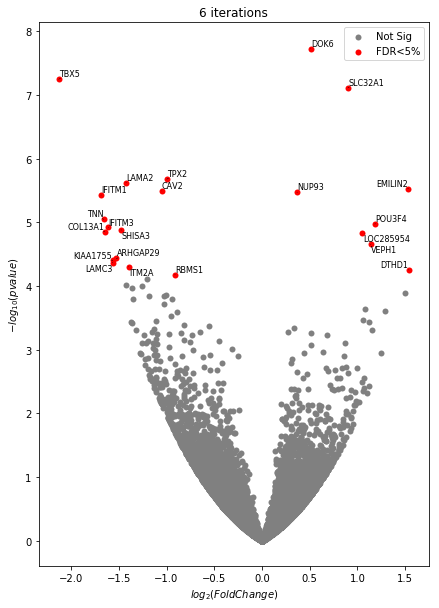

In [6]:
plot_volcano(adjust=True)